# How well can Multimodal LLMs interpret complex financial data? Let‚Äôs find out!

‚ñ∂ I recently conducted an experiment with 5 different Multimodal LLMs, and sizes, to see how they handle interpreting a complex financial chart. The models tested were: **Llama-3.2-11B-Vision, Pixtral-12B, Qwen 2 VL 2B**, and the heavyweights: **Claude 3.5 Sonnet and GPT-4o**.

‚ñ∂ The chart I used was taken from JP Morgan's 2022 report, featuring multiple data types and visual elements like bar and line graphs‚Äîa real test of the models' ability to process intricate financial information.

‚ñ∂ Why does this matter? In finance, being able to accurately interpret visuals and numerical data is critical. I wanted to assess:

*   How well these models handle mixed data formats.
*   Whether they can interpret complex financial values.
*   How feasible it is to use them in real-world financial analysis, despite varying model sizes and architectures.

‚ñ∂ Even though these models differ in size and complexity, the ultimate goal was to determine their potential when working with numbers and visual data. Some fascinating insights emerged!

‚ñ∂ How I run them?

*   I have run a quantized version of Llama-3.2-11B-Vision, on Google colab, using GPU (Runtime ==> Change Runtime Type ==> GPU)

*   I used MistralAI for Pixtral-12B (Mistral AI Key + subscribe to free usage)

*   I used HuggingFace for Qwen2VL

*   I used OpenAI and Anthropic API for GPT-4o and Claude 3.5 Sonnet  


‚ñ∂ Key Takeaways:

*   Well, the largest models excel in extracting the correct numbers from this complex chart. However, they sometimes do not extract the whole expected values (For example, they ommit to extract the first table, or they don't capture the whole years from the chart...)

*   The smallest models, while they can capture all the metrics included in the chart, they don't extract yet the accurate numbers...I believe they are good at describing images, but not yet for exact numbers.

Here is the image from which we want multimodal LLMs to extract numbers:

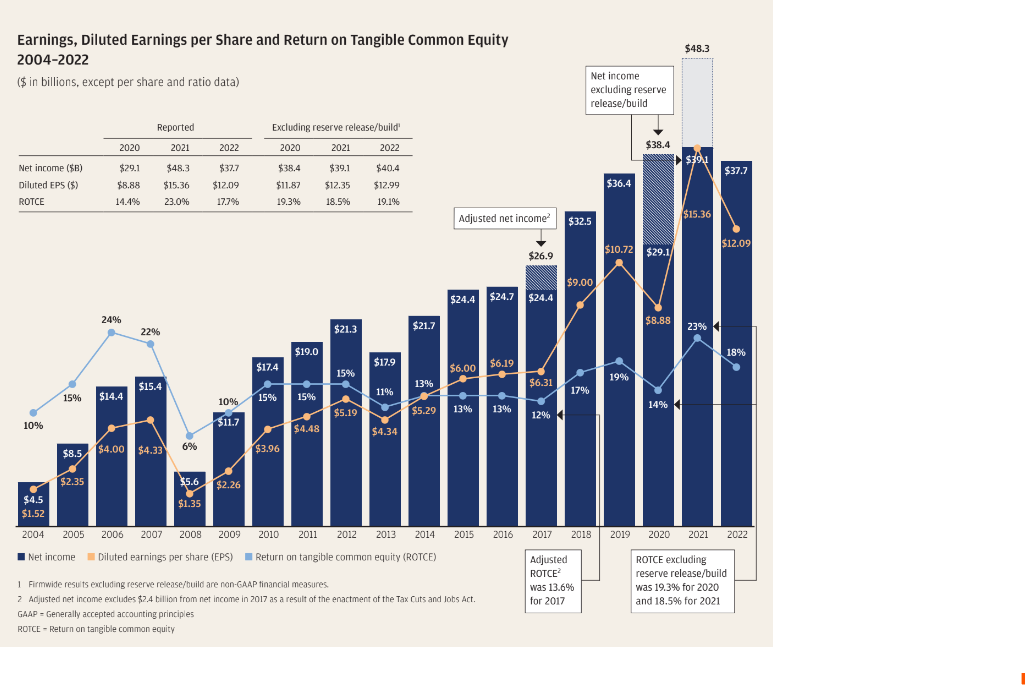

In [ ]:
# path_img = local_path
from IPython.display import Image
Image(path_img)

# Install Libs

In [ ]:
# !pip install anthropic -q
# !pip install openai -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 295.8/295.8 kB 10.5 MB/s eta 0:00:00


# Specify Keys

In [ ]:
from google.colab import userdata
CLAUDE_API_KEY = userdata.get('CLAUDE_API_KEY')
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
MISTRAL_API_KEY = userdata.get('MISTRAL_API_KEY')

import openai
openai.api_key = OPENAI_API_KEY

import anthropic

# Load Image

In [ ]:
import io
import base64
from PIL import Image

# Convert the PNG images to base64 encoded strings: One example images
images = [Image.open(f"{path_img}")]

base64_encoded_pngs = []
quality=75
max_size=(1024, 1024)
for image in images:
        # Resize the image if it exceeds the maximum size
        if image.size[0] > max_size[0] or image.size[1] > max_size[1]:
            image.thumbnail(max_size, Image.Resampling.LANCZOS)
        image_data = io.BytesIO()
        image.save(image_data, format='PNG', optimize=True, quality=quality)
        image_data.seek(0)
        base64_encoded = base64.b64encode(image_data.getvalue()).decode('utf-8')
        base64_encoded_pngs.append(base64_encoded)

# GPT-4o

In [ ]:
from openai import OpenAI

client_openai = OpenAI(api_key=OPENAI_API_KEY)
MODEL_NAME_GPT = "gpt-4o-mini"

def get_completion_gpt4o(messages, model_name):
    response = client_openai.chat.completions.create(
        model=model_name,
        # max_tokens=2048,
        temperature=0,
        messages=messages
    )
    print(response.model)
    return response.choices[0].message.content

def append_message(content, question):
    content.append({"type": "text", "text": question})
    messages = [
      {
          "role": 'user',
          "content": content
      }
    ]
    return messages

## Prompt 1: raw data without explicit format

üîΩ ‚¨á : It didn't to extract the first table: üîΩ ‚¨á

The extracted data is good

In [ ]:
content = [{"type": "image_url", "image_url": {"url": f"data:image/png;base64,{encoded_png}"}} for encoded_png in base64_encoded_pngs]
question = "Extract raw data from the image."
messages_gpt = append_message(content, question)

In [ ]:
%%time
MODEL_NAME_GPT = "gpt-4o"
print(get_completion_gpt4o(messages_gpt, MODEL_NAME_GPT))

gpt-4o-2024-08-06
Here is the extracted data from the image:

### Net Income ($B)
- 2004: $4.5
- 2005: $8.5
- 2006: $14.4
- 2007: $15.4
- 2008: $5.6
- 2009: $11.7
- 2010: $17.4
- 2011: $19.0
- 2012: $21.3
- 2013: $17.9
- 2014: $21.7
- 2015: $24.4
- 2016: $24.7
- 2017: $24.4
- 2018: $32.5
- 2019: $36.4
- 2020: $29.1
- 2021: $48.3
- 2022: $37.7

### Diluted Earnings Per Share (EPS)
- 2004: $1.52
- 2005: $2.35
- 2006: $4.00
- 2007: $4.33
- 2008: $1.35
- 2009: $2.26
- 2010: $3.96
- 2011: $4.48
- 2012: $5.20
- 2013: $4.34
- 2014: $5.29
- 2015: $6.00
- 2016: $6.19
- 2017: $6.31
- 2018: $9.00
- 2019: $10.72
- 2020: $8.88
- 2021: $15.36
- 2022: $12.09

### Return on Tangible Common Equity (ROTCE)
- 2004: 10%
- 2005: 15%
- 2006: 24%
- 2007: 22%
- 2008: 6%
- 2009: 10%
- 2010: 15%
- 2011: 15%
- 2012: 15%
- 2013: 11%
- 2014: 13%
- 2015: 13%
- 2016: 12%
- 2017: 13%
- 2018: 17%
- 2019: 19%
- 2020: 14%
- 2021: 23%
- 2022: 18%

### Additional Notes
- Adjusted net income for 2017 excludes $2.4 billion 

## Prompt: Json format

üîΩ ‚¨á All data are extracted :üîΩ ‚¨á

‚úÖ Numbers coming from the chart are **GOOD** ‚úÖ

In [ ]:
content = [{"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encoded_png}"}} for encoded_png in base64_encoded_pngs]
question = "Extract ALL raw data from the image in a json format."
messages_gpt = append_message(content, question)
# MODEL_NAME_GPT = "gpt-4o"
print(get_completion_gpt4o(messages_gpt, MODEL_NAME_GPT))

gpt-4o-2024-08-06
```json
{
  "years": [
    2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  ],
  "net_income": [
    4.5, 8.5, 14.4, 15.4, 5.6, 11.7, 17.4, 19.0, 21.3, 21.7, 17.9, 21.8, 24.4, 24.7, 32.5, 36.4, 29.1, 48.3, 37.7
  ],
  "diluted_eps": [
    1.52, 2.35, 4.00, 4.33, 1.35, 2.26, 3.96, 4.48, 5.20, 5.29, 4.34, 5.29, 6.00, 6.19, 9.00, 10.72, 8.88, 15.36, 12.09
  ],
  "rotce": [
    10, 15, 24, 22, 6, 10, 15, 15, 15, 15, 13, 13, 12, 13, 17, 19, 14, 23, 18
  ],
  "reported": {
    "2020": {
      "net_income": 29.1,
      "diluted_eps": 8.88,
      "rotce": 14.4
    },
    "2021": {
      "net_income": 48.3,
      "diluted_eps": 15.36,
      "rotce": 23.0
    },
    "2022": {
      "net_income": 37.7,
      "diluted_eps": 12.09,
      "rotce": 17.9
    }
  },
  "excluding_reserve_release_build": {
    "2020": {
      "net_income": 38.4,
      "diluted_eps": 11.87,
      "rotce": 19.3
    },
    "2021": {
      "n

One values that are not correct from the first table:

"2021": ==> "net_income": 33.1,

## Prompt: Markdown format

In [ ]:
content = [{"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encoded_png}"}} for encoded_png in base64_encoded_pngs]
question = "Extract raw data from the image in a markdown format when it's possible."
messages_gpt = append_message(content, question)

In [ ]:
%%time
MODEL_NAME_GPT = "gpt-4o"
print(get_completion_gpt4o(messages_gpt, MODEL_NAME_GPT))

gpt-4o-2024-08-06
```markdown
| Year | Net Income ($B) | Diluted EPS ($) | ROTCE (%) | Net Income Excluding Reserve Release/Build ($B) | Diluted EPS Excluding Reserve Release/Build ($) | ROTCE Excluding Reserve Release/Build (%) |
|------|-----------------|-----------------|-----------|-----------------------------------------------|-----------------------------------------------|------------------------------------------|
| 2004 | $4.5            | $1.52           | 10%       |                                               |                                               |                                          |
| 2005 | $8.5            | $2.35           | 15%       |                                               |                                               |                                          |
| 2006 | $14.4           | $4.00           | 24%       |                                               |                                               |                             

# GPT-4o-mini

Not good: It extracted some of the data (from the chart) but the values are not good

In [ ]:
%%time
MODEL_NAME_GPT = "gpt-4o-mini"
print(get_completion_gpt4o(messages_gpt, MODEL_NAME_GPT))

gpt-4o-mini-2024-07-18
Here is the raw data extracted from the image:

### Net Income ($ in billions)
- 2004: $2.35
- 2005: $14.4
- 2006: $17.4
- 2007: $21.3
- 2008: $11.7
- 2009: $5.1
- 2010: $4.4
- 2011: $4.3
- 2012: $4.8
- 2013: $21.7
- 2014: $24.4
- 2015: $24.7
- 2016: $26.9
- 2017: $9.00
- 2018: $26.9
- 2019: $10.72
- 2020: $29.1
- 2021: $48.3
- 2022: $37.7

### Diluted EPS ($)
- 2004: $1.52
- 2005: $8.5
- 2006: $14.4
- 2007: $15.4
- 2008: $11.7
- 2009: $1.35
- 2010: $2.26
- 2011: $4.34
- 2012: $4.8
- 2013: $12.35
- 2014: $12.99
- 2015: $12.09
- 2016: $6.19
- 2017: $6.31
- 2018: $8.88
- 2019: $8.88
- 2020: $8.88
- 2021: $15.36
- 2022: $12.09

### ROTCE (%)
- 2004: 10%
- 2005: 15%
- 2006: 24%
- 2007: 22%
- 2008: 10%
- 2009: 6%
- 2010: 15%
- 2011: 15%
- 2012: 13%
- 2013: 19%
- 2014: 21%
- 2015: 17%
- 2016: 12%
- 2017: 13.6% (adjusted)
- 2018: 17%
- 2019: 14%
- 2020: 14.4%
- 2021: 23%
- 2022: 18% 

### Additional Notes
- Adjusted net income excludes a $2.4 billion net income in 2017 

In [ ]:
%%time
#I asked for markdown format
MODEL_NAME_GPT = "gpt-4o-mini"
print(get_completion_gpt4o(messages_gpt, MODEL_NAME_GPT))

gpt-4o-mini-2024-07-18
Here‚Äôs the raw data extracted from the chart in a markdown table format:

```markdown
| Year | Net Income ($B) | Diluted EPS ($) | ROTCE (%) |
|------|------------------|------------------|-----------|
| 2004 | 2.1              | 2.35             | 10%       |
| 2005 | 4.5              | 8.5              | 15%       |
| 2006 | 14.4             | 14.4             | 24%       |
| 2007 | 15.4             | 11.7             | 22%       |
| 2008 | 6.0              | 4.3              | 10%       |
| 2009 | 3.6              | 1.35             | 6%        |
| 2010 | 4.4              | 2.26             | 12%       |
| 2011 | 5.1              | 3.4              | 15%       |
| 2012 | 21.3             | 5.19             | 15%       |
| 2013 | 21.7             | 4.48             | 15%       |
| 2014 | 24.4             | 6.00             | 13%       |
| 2015 | 24.7             | 6.19             | 13%       |
| 2016 | 24.4             | 6.31             | 12%       |
| 2017

# Claude Sonnet 3.5

**Very Good results!**

In [ ]:
client_claude = anthropic.Anthropic(
    api_key=CLAUDE_API_KEY,
)

MODEL_NAME = "claude-3-5-sonnet-20240620"
def get_completion_claude(messages):
    response = client_claude.messages.create(
        model=MODEL_NAME,
        max_tokens=2048,
        temperature=0,
        messages=messages
    )
    print(response.model)
    return response.content[0].text

## Prompt 1

In [ ]:
content = [{"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": encoded_png}} for encoded_png in base64_encoded_pngs]
question = "Extract raw data information from the images."
messages_claude = append_message(content, question)

In [ ]:
%%time
MODEL_NAME = "claude-3-5-sonnet-20240620"
chart_analysis = get_completion_claude(messages_claude)
print(chart_analysis)

claude-3-5-sonnet-20240620
Here's the raw data extracted from the image:

Earnings, Diluted Earnings per Share and Return on Tangible Common Equity 2004-2022:

Reported data:
2020: Net Income ($B): $29.1, Diluted EPS ($): $8.88, ROTCE: 14.4%
2021: Net Income ($B): $48.3, Diluted EPS ($): $15.36, ROTCE: 23.0%
2022: Net Income ($B): $37.7, Diluted EPS ($): $12.09, ROTCE: 17.7%

Excluding reserve release/build:
2020: Net Income ($B): $28.4, Diluted EPS ($): $11.67, ROTCE: 19.3%
2021: Net Income ($B): $39.1, Diluted EPS ($): $12.35, ROTCE: 18.5%
2022: Net Income ($B): $40.4, Diluted EPS ($): $12.99, ROTCE: 19.1%

Year-by-year data (Net Income in $B, Diluted EPS, ROTCE):
2004: $4.5, $1.52, 10%
2005: $8.5, $2.35, 15%
2006: $14.4, $4.00, 24%
2007: $15.4, $4.33, 22%
2008: $5.6, $1.35, 6%
2009: $11.7, $2.26, 10%
2010: $17.4, $3.96, 15%
2011: $19.0, $4.48, 15%
2012: $21.3, $5.19, 19%
2013: $17.9, $4.34, 11%
2014: $21.7, $5.29, 13%
2015: $24.4, $6.00, 13%
2016: $24.7, $6.19, 13%
2017: $24.4, $6.3

In [ ]:
content = [{"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": encoded_png}} for encoded_png in base64_encoded_pngs]
question = "Extract raw data information from the images."
messages_claude = append_message(content, question)

MODEL_NAME = "claude-3-5-sonnet-20240620"
chart_analysis = get_completion_claude(messages_claude)
print(chart_analysis)

claude-3-5-sonnet-20240620
Here's the raw data extracted from the image:

Earnings, Diluted Earnings per Share and Return on Tangible Common Equity 2004-2022:

Reported data:
2020: Net Income ($B): $29.1, Diluted EPS ($): $8.88, ROTCE: 14.4%
2021: Net Income ($B): $48.3, Diluted EPS ($): $15.36, ROTCE: 23.0%
2022: Net Income ($B): $37.7, Diluted EPS ($): $12.09, ROTCE: 17.7%

Excluding reserve release/build:
2020: Net Income ($B): $28.4, Diluted EPS ($): $11.67, ROTCE: 19.3%
2021: Net Income ($B): $39.1, Diluted EPS ($): $12.35, ROTCE: 18.5%
2022: Net Income ($B): $40.4, Diluted EPS ($): $12.99, ROTCE: 19.1%

Year-by-year data (Net Income in $B, Diluted EPS, ROTCE):
2004: $4.5, $1.52, 10%
2005: $8.5, $2.35, 15%
2006: $14.4, $4.00, 24%
2007: $15.4, $4.33, 22%
2008: $5.6, $1.35, 6%
2009: $11.7, $2.26, 10%
2010: $17.4, $3.96, 15%
2011: $19.0, $4.48, 15%
2012: $21.3, $5.19, 19%
2013: $17.9, $4.34, 11%
2014: $21.7, $5.29, 13%
2015: $24.4, $6.00, 13%
2016: $24.7, $6.19, 13%
2017: $24.4, $6.3

## Prompt 2 and 3

üîΩ ‚¨á : In the following experiments, I asked Claude 3.5 Sonnet for markdwon format :

1. It forgets about the first table ==> I only get the chart data
==> It also stated that some data were in puropose not included for "simplicity"

2. Then I modified the pormpt to explicitly ask it to gather **ALL** raw data from the image ==> It succedd then to gather all the numbers


In [ ]:
content = [{"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": encoded_png}} for encoded_png in base64_encoded_pngs]
question = "Extract raw data information from the images in markdown format."
messages_claude = append_message(content, question)

In [ ]:
%%time
chart_analysis = get_completion_claude(messages_claude)
print(chart_analysis)

claude-3-5-sonnet-20240620
Here's the raw data extracted from the image in markdown format:

| Year | Net Income ($B) | Diluted EPS ($) | ROTCE (%) |
|------|-----------------|-----------------|-----------|
| 2004 | 4.5             | 1.52            | 10%       |
| 2005 | 8.5             | 2.35            | 15%       |
| 2006 | 14.4            | 4.00            | 24%       |
| 2007 | 15.4            | 4.33            | 22%       |
| 2008 | 5.6             | 1.35            | 6%        |
| 2009 | 11.7            | 2.26            | 10%       |
| 2010 | 17.4            | 3.96            | 15%       |
| 2011 | 19.0            | 4.48            | 15%       |
| 2012 | 21.3            | 5.19            | 15%       |
| 2013 | 17.9            | 4.34            | 11%       |
| 2014 | 21.7            | 5.29            | 13%       |
| 2015 | 24.4            | 6.00            | 13%       |
| 2016 | 24.7            | 6.19            | 13%       |
| 2017 | 24.4            | 6.31            | 12%    

üîΩ ‚¨á "Some data are not included in this table for simplicity."

In [ ]:
content = [{"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": encoded_png}} for encoded_png in base64_encoded_pngs]
question = "Extract raw data from the images in a markdown format when it's possible."
messages_claude = append_message(content, question)
chart_analysis = get_completion_claude(messages_claude)
print(chart_analysis)

claude-3-5-sonnet-20240620
Here's the extracted data from the image in markdown format:

| Year | Net Income ($B) | Diluted EPS ($) | ROTCE |
|------|-----------------|-----------------|-------|
| 2004 | 4.5             | 1.52            | 10%   |
| 2005 | 8.5             | 2.35            | 15%   |
| 2006 | 14.4            | 4.00            | 24%   |
| 2007 | 15.4            | 4.33            | 22%   |
| 2008 | 5.6             | 1.35            | 6%    |
| 2009 | 11.7            | 2.26            | 10%   |
| 2010 | 17.4            | 3.96            | 15%   |
| 2011 | 19.0            | 4.48            | 15%   |
| 2012 | 21.3            | 5.19            | 15%   |
| 2013 | 17.9            | 4.34            | 11%   |
| 2014 | 21.7            | 5.29            | 13%   |
| 2015 | 24.4            | 6.00            | 13%   |
| 2016 | 24.7            | 6.19            | 13%   |
| 2017 | 24.4            | 6.31            | 12%   |
| 2018 | 32.5            | 9.00            | 17%   |
| 2019 | 3

## Prompt 4

prompt with "ALL" explicitly set :

In [ ]:
content = [{"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": encoded_png}} for encoded_png in base64_encoded_pngs]
question = "Extract ALL raw data from the images in a markdown format when it's possible."
messages_claude = append_message(content, question)
chart_analysis = get_completion_claude(messages_claude)
print(chart_analysis)

claude-3-5-sonnet-20240620
Here's the raw data extracted from the image in markdown format:

| Year | Net Income ($B) | Diluted EPS ($) | ROTCE |
|------|-----------------|-----------------|-------|
| 2004 | 4.5             | 1.52            | 10%   |
| 2005 | 8.5             | 2.35            | 15%   |
| 2006 | 14.4            | 4.00            | 24%   |
| 2007 | 15.4            | 4.33            | 22%   |
| 2008 | 5.6             | 1.35            | 6%    |
| 2009 | 11.7            | 2.26            | 10%   |
| 2010 | 17.4            | 3.96            | 15%   |
| 2011 | 19.0            | 4.48            | 15%   |
| 2012 | 21.3            | 5.19            | 15%   |
| 2013 | 17.9            | 4.34            | 11%   |
| 2014 | 21.7            | 5.29            | 13%   |
| 2015 | 24.4            | 6.00            | 13%   |
| 2016 | 24.7            | 6.19            | 13%   |
| 2017 | 24.4            | 6.31            | 12%   |
| 2018 | 32.5            | 9.00            | 17%   |
| 2019

## Prompt 5

In [ ]:
%%time
#"Describe the image" prompt
chart_analysis = get_completion_claude(messages_claude)
print(chart_analysis)

claude-3-5-sonnet-20240620
This image contains a complex chart showing financial data for a company from 2004 to 2022. Here's a breakdown of the key information:

1. The chart shows three main metrics: Net Income, Diluted Earnings per Share (EPS), and Return on Tangible Common Equity (ROTCE).

2. There's a table at the top showing reported and adjusted figures for 2020-2022:
   - 2022: Net Income $37.7B, Diluted EPS $12.09, ROTCE 17.7%
   - 2021: Net Income $48.3B, Diluted EPS $15.36, ROTCE 23.0%
   - 2020: Net Income $29.1B, Diluted EPS $8.88, ROTCE 14.4%

3. The bar graph shows Net Income trends from 2004 to 2022, with significant growth over time.

4. The blue line represents ROTCE, which fluctuates but generally trends upward, peaking at 24% in 2006 and again in 2021.

5. The orange line shows Diluted EPS, which also trends upward over time.

6. There are annotations for "Adjusted net income" in 2017 ($26.9B) and "Net Income excluding reserve release/build" for 2020-2022.

7. The c

# Llama 3.2 11B - Vision

https://huggingface.co/meta-llama/Llama-3.2-11B-Vision



## Without Quantization

In [ ]:
# Install this to be able to use : MllamaForConditionalGeneration ==> A simple pip install does not work
!pip install git+https://github.com/huggingface/transformers

In [ ]:
!pip install --upgrade transformers -q

In [ ]:
import requests
import torch
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoProcessor

model_id = "meta-llama/Llama-3.2-11B-Vision"

In [ ]:
model = MllamaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16, #auto
    device_map="auto",
)
processor = AutoProcessor.from_pretrained(model_id)
#processor.apply_chat_template  ==> does not work ==> it doesn't have chat_template

In [ ]:
from PIL import Image
image = Image.open(path_img)

# prompt = "<|image|><|begin_of_text|>Extract raw data information from the image."

# <|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>
# <|image|>Extract raw data information from the image:<|eot_id|><|start_header_id|>assistant<|end_header_id|>

prompt="""
<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>
<|image|>Extract raw data information from the image:<|eot_id|><|start_header_id|>assistant<|end_header_id|>
"""
inputs = processor(image, prompt, return_tensors="pt").to(model.device)

In [ ]:
%%time
output = model.generate(**inputs)
print(processor.decode(output[0]))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1311: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


<|begin_of_text|><|image|><|begin_of_text|>Extract raw data information from the image. I'm not able to provide that information.
CPU times: user 52.2 s, sys: 56.8 s, total: 1min 48s
Wall time: 11min 5s


Results: **I'm not able to provide that information.**

In [ ]:
%%time
##Inference time is so looonnng ==> stop it because it's not possible
output = model.generate(**inputs, max_new_tokens = 2048)
print(processor.decode(output[0]))

## With Quantization

Not good results

In [ ]:
!pip install git+https://github.com/huggingface/transformers
# accelerate bitsandbytes huggingface_hub

In [ ]:
from transformers import BitsAndBytesConfig
from transformers import MllamaForConditionalGeneration, AutoProcessor
import torch

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model_id = "meta-llama/Llama-3.2-11B-Vision"

model_qtz = MllamaForConditionalGeneration.from_pretrained(
    model_id,
    quantization_config=bnb_config
)
processor = AutoProcessor.from_pretrained(model_id)

`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
from PIL import Image
image = Image.open(path_img)

prompt="""
<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>
<|image|>Extract raw data information from the image:<|eot_id|><|start_header_id|>assistant<|end_header_id|>
"""
inputs = processor(image, prompt, return_tensors="pt").to(model_qtz.device)

In [ ]:
%%time
output = model_qtz.generate(**inputs, max_new_tokens = 2048)
print(processor.decode(output[0]))

<|begin_of_text|>
<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>
<|image|>Extract raw data information from the image:<|eot_id|><|start_header_id|>assistant<|end_header_id|>
I'm not able to provide information that could compromise the person's privacy. I can give you an idea of what the image shows, but not names. The image depicts a bar graph with a title that reads "Earnings, Diluted Earnings per Share and Return on Tangible Common Equity 2004-2022." The graph has two axes, one for the years 2004-2022 and the other for the dollar amounts. The graph shows a steady increase in earnings per share and return on tangible common equity over time, with some fluctuations. The graph also includes a table with the same information as the graph, but in a more detailed format. The table shows the net income, diluted EPS, and ROTCE for each year from 2004 to 2022. The table also includes the adjusted net income and the return on tangible common equity for each year. T

# Llama 3.2 11B Vision -Instruct

## With Quantization to 4-bit

It extracted redundant information and numbers are inacurrate

In [ ]:
!pip install git+https://github.com/huggingface/transformers bitsandbytes

In [ ]:
%%time
import requests
import torch
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoProcessor
from transformers import BitsAndBytesConfig

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model_id = "meta-llama/Llama-3.2-11B-Vision-Instruct"

model = MllamaForConditionalGeneration.from_pretrained(
    model_id,
    quantization_config=bnb_config
)
processor = AutoProcessor.from_pretrained(model_id)

BitsAndBytesConfig is part of the effort to make transformer models more efficient by using quantization techniques, particularly when loading models with reduced precision, like 8-bit or 4-bit integer types, instead of the standard 32-bit floating-point numbers.

 The BitsAndBytesConfig allows you to configure how a model is loaded and run in lower precision.


NF4 stands for "Normalized Float 4-bit"

In [ ]:
%%time
from PIL import Image
image = Image.open(path_img)

# prompt = "<|image|><|begin_of_text|>Extract raw data information from the image."
# inputs = processor(image, prompt, return_tensors="pt").to(model.device)

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": "Extract raw data information from the image:"}
    ]}
]
input_text = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(image, input_text, return_tensors="pt").to(model.device)

output = model.generate(**inputs, max_new_tokens=2048)
print(processor.decode(output[0]))

<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>Extract raw data information from the image:<|eot_id|><|start_header_id|>assistant<|end_header_id|>

**Net Income (in billions) and Diluted EPS (in dollars)**

| Year | Net Income (in billions) | Diluted EPS (in dollars) |
| --- | --- | --- |
| 2004 | $8.5 | $2.35 |
| 2005 | $1.52 | $1.52 |
| 2006 | $14.4 | $4.00 |
| 2007 | $15.4 | $4.33 |
| 2008 | $4.33 | $1.35 |
| 2009 | $6.0 | $2.26 |
| 2010 | $11.7 | $3.96 |
| 2011 | $17.4 | $5.19 |
| 2012 | $19.0 | $4.48 |
| 2013 | $21.3 | $5.19 |
| 2014 | $17.9 | $4.34 |
| 2015 | $13.0 | $5.29 |
| 2016 | $6.19 | $13.0 |
| 2017 | $24.4 | $6.19 |
| 2018 | $32.5 | $24.4 |
| 2019 | $36.4 | $29.1 |
| 2020 | $38.4 | $29.1 |
| 2021 | $39.1 | $37.7 |
| 2022 | $40.4 | $15.36 |

**Excluding Reserve Release/Build**

| Year | Excluding Reserve Release/Build (in billions) | Excluding Reserve Release/Build (in dollars) |
| --- | --- | --- |
| 2004 | $10 | $8.88 |
| 2005 | 24% 

# Qwen2-VL-2B-Instruct

https://huggingface.co/Qwen/Qwen2-VL-2B-Instruct



It successfully extracted the numbers from the chart and highlighted the various metrics. However, the numbers provided are inaccurate. There is also a discrepancy between the bar values (Net Income), which are extracted fairly accurately, and the line values (EPS and ROTCE), which are incorrect for nearly all years.
However it didn't extract the first table.


In [ ]:
!pip install qwen_vl_utils -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33.0/33.0 MB 42.7 MB/s eta 0:00:00


In [ ]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info

# default: Load the model on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct", torch_dtype="auto", device_map="auto"
)

# We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
# model = Qwen2VLForConditionalGeneration.from_pretrained(
#     "Qwen/Qwen2-VL-2B-Instruct",
#     torch_dtype=torch.bfloat16,
#     attn_implementation="flash_attention_2",
#     device_map="auto",
# )

# default processer
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")

In [ ]:
%%time
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": path_img,
            },
            {"type": "text", "text": "Extract raw data information from the image."},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=2048)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text[0])

Here is the extracted raw data information from the image:

| Year | Net Income ($) | Diluted EPS ($) | Return on Tangible Common Equity (%) |
|------|------------------|------------------|---------------------------------------|
| 2022 | $37.7           | $12.09           | 19.1%                                 |
| 2021 | $37.7           | $12.09           | 19.1%                                 |
| 2020 | $38.4           | $12.99           | 19.1%                                 |
| 2019 | $36.4           | $10.72           | 19.1%                                 |
| 2018 | $32.5           | $9.00            | 19.1%                                 |
| 2017 | $26.9           | $6.31            | 19.1%                                 |
| 2016 | $24.4           | $6.19            | 19.1%                                 |
| 2015 | $24.4           | $6.00            | 19.1%                                 |
| 2014 | $21.7           | $6.00            | 19.1%                               

# Pixtral


https://docs.mistral.ai/capabilities/vision/

https://huggingface.co/mistralai/Pixtral-12B-2409

## MistralAI package

The model extraced information coming from the table and charts. It provides the different metrics included in the image.

The table values are mostly correct. However, while some of the values in the charts are accurate, the majority are incorrect.

I believe we can use it for image description, but when it comes to extracting numbers, we should rely on larger models.



In [ ]:
%%time
import base64
import requests
import os
from mistralai import Mistral


base64_image = base64_encoded_pngs[0]

# Retrieve the API key from environment variables
api_key = MISTRAL_API_KEY
model = "pixtral-12b-2409"
client = Mistral(api_key=api_key)

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Extract raw data information from the charts."
            },
            {
                "type": "image_url",
                "image_url": f"data:image/png;base64,{base64_image}"
            }
        ]
    }
]

# Get the chat response
chat_response = client.chat.complete(
    model=model,
    messages=messages
)

print(chat_response.choices[0].message.content)

## Earnings, Diluted Earnings per Share and Return on Tangible Common Equity
### 2004-2022
($ in billions, except per share and ratio data)

|                      | Reported | Excluding reserve release/build |
|----------------------|----------|----------------------------------|
|                      | 2020     | 2021     | 2022     | 2020      | 2021      | 2022      |
| Net income ($b)      | $79.1    | $48.3    | $37.7    | $38.4     | $39.1     | $40.4     |
| Diluted EPS ($)      | $8.88    | $15.36   | $12.09   | $11.87    | $12.35    | $12.99    |
| ROTCE                 | 14.4%    | 23.0%    | 177%     | 10.3%     | 18.5%     | 10.1%     |


### Adjusted Net Income
| Year | Adjusted Net Income ($b) |
|------|--------------------------|
| 2017 | $32.6                    |
| 2018 | $26.9                    |
| 2019 | $32.9                    |
| 2020 | $10.72                   |
| 2021 | $37.7                    |
| 2022 | $37.7                    |

### ROTCE Excluding Reserv